In [24]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, OPTICS

import librosa, librosa.display
import mir_eval
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (10, 3)

# Source Separation: Clustering
- k means
- affinity propagation
- optics

## audio data: drum sample

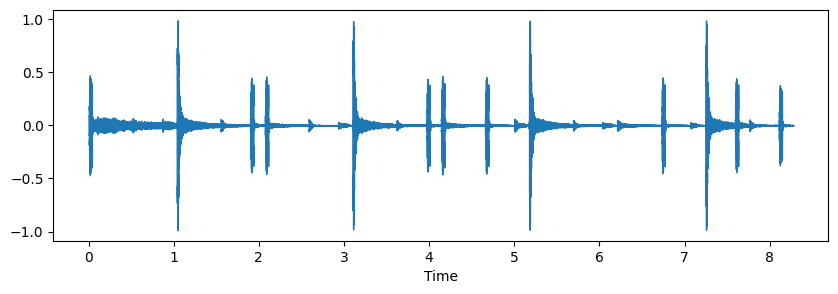

In [115]:
# fn_wav = '../audio/125_bounce.wav'
fn_wav = '../audio/58bpm.wav'

x, fs = librosa.load(fn_wav)
librosa.display.waveshow(y=x, sr=fs)
plt.show()

In [133]:
# onest detection
onset_frames = librosa.onset.onset_detect(y=x, sr=fs, delta=0.02, wait=4)
onset_times = librosa.frames_to_time(onset_frames, sr=fs)
onset_samples = librosa.frames_to_samples(onset_frames)

In [134]:
x_with_beeps = mir_eval.sonify.clicks(times=onset_times, fs=fs, length=len(x))
ipd.display(ipd.Audio(x, rate=fs))
print('with onset')
ipd.display(ipd.Audio(x + x_with_beeps, rate=fs))

with onset


킥, 하이햇, 스네어, 트라이앵글 정도로 생각해보자

## Features

In [135]:
# Feature Extraction

#Let's compute the zero crossing rate and energy for each detected onset.

def extract_features(x, fs):
    zcr = librosa.zero_crossings(x).sum()
    energy = scipy.linalg.norm(x)
    return [zcr, energy]

frame_sz = fs*0.090
features = np.array([extract_features(x[i:int(i+frame_sz)], fs) for i in onset_samples])
print(features.shape)

(25, 2)


In [136]:
# min max feature scaling

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max_scaler.fit_transform(features)
print(features_scaled.shape)
print(features_scaled.min(axis=0))
print(features_scaled.max(axis=0))

(25, 2)
[-1. -1.]
[1. 1.]


Text(0, 0.5, 'Spectral Centroid (scaled)')

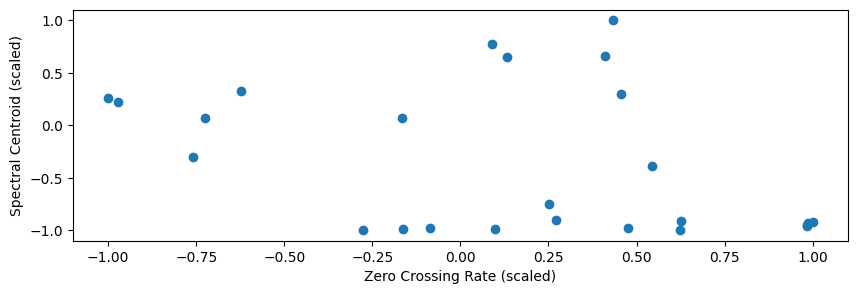

In [137]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Spectral Centroid (scaled)')

## Clustering
### K-means

In [138]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters)
labels = model.fit_predict(features_scaled)
print(labels)

[1 1 3 0 1 2 0 3 3 0 1 2 0 2 3 0 1 3 3 2 3 3 2 1 2]


C:\Users\JHCho\anaconda3\envs\mir\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


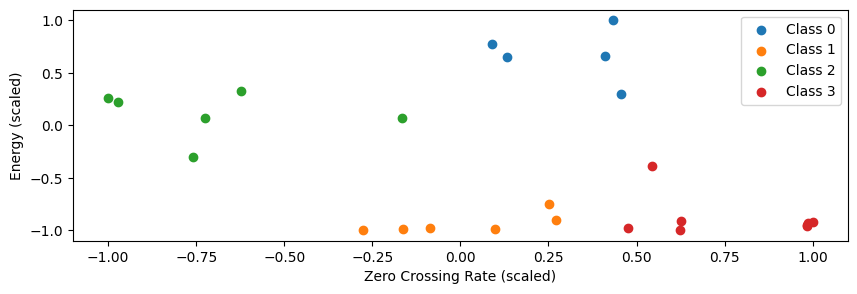

In [139]:
for i in range(n_clusters):
    plt.scatter(features_scaled[labels==i,0], features_scaled[labels==i,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend([f'Class {i}' for i in range(n_clusters)])

In [140]:
for i in range(n_clusters):
    x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==i], fs, length=len(x))
    ipd.display(ipd.Audio(x + x_with_beeps, rate=fs))

### Affinity Propagation

In [141]:
model = AffinityPropagation()
labels = model.fit_predict(features_scaled)
n_clusters=len(np.unique(labels))
print(labels,'\n' 'number of clusters: ', n_clusters)

[2 2 0 1 2 3 1 0 0 1 2 3 1 3 0 1 2 0 0 3 0 0 3 2 3] 
number of clusters:  4


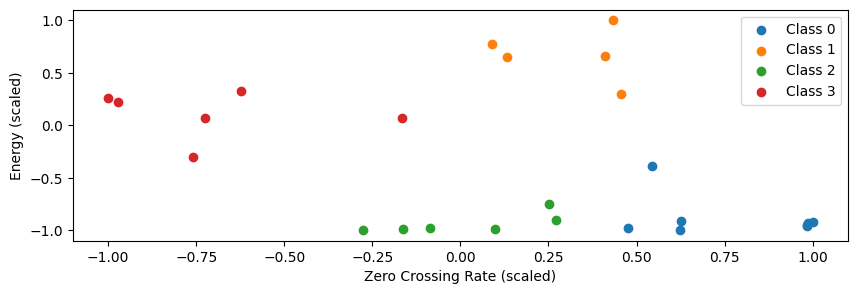

In [142]:
for i in range(n_clusters):
    plt.scatter(features_scaled[labels==i,0], features_scaled[labels==i,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend([f'Class {i}' for i in range(n_clusters)])

In [143]:
for i in range(n_clusters):
    x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==i], fs, length=len(x))
    ipd.display(ipd.Audio(x + x_with_beeps, rate=fs))

### OPTICS

In [144]:
model = OPTICS()
labels = model.fit_predict(features_scaled)+1 # optics labels start with -1
n_clusters=len(np.unique(labels))
print(labels,'\n' 'number of clusters: ', n_clusters)

[0 1 1 0 1 0 0 0 0 0 0 2 0 2 0 0 1 0 0 2 0 0 2 1 2] 
number of clusters:  3


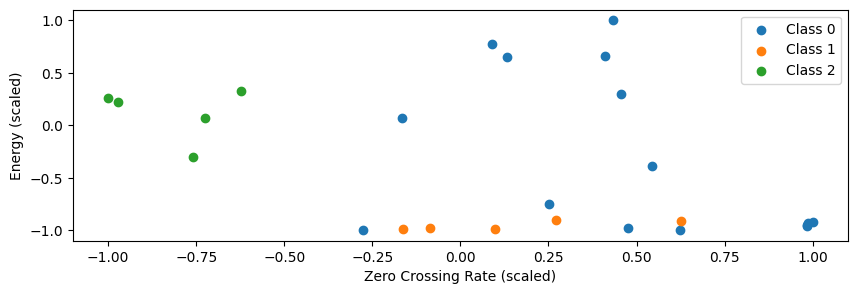

In [145]:
for i in range(n_clusters):
    plt.scatter(features_scaled[labels==i,0], features_scaled[labels==i,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend([f'Class {i}' for i in range(n_clusters)])

In [146]:
for i in range(n_clusters):
    x_with_beeps = mir_eval.sonify.clicks(onset_times[labels==i], fs, length=len(x))
    ipd.display(ipd.Audio(x + x_with_beeps, rate=fs))